# BRAZIL REAL ESTATE DATA PRE-PROCESSING

### Import Librares and Load Raw Dataset

In [1]:
#import libraries

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

pd.options.display.max_columns = None

#### Load Dataset: Option 1 (for reproducibility)

In [2]:
#run PY file to query data directly from BigQuery (estimated runtime: 10 minutes)

#%run -i "BigQuery Integration.py"

#### Load Dataset: Option 2 (for simplicity)

In [3]:
#load data from the CSV file output of BigQuery Integration.py file

rent_df = pd.read_csv('Dataset/Raw/Brazil Listing (Rent).csv', index_col = 0, parse_dates = ['created_on'])
sell_df = pd.read_csv('Dataset/Raw/Brazil Listing (Sell).csv', index_col = 0, parse_dates = ['created_on'])

#concatenate rent and sell dataframe
data = pd.concat([rent_df, sell_df]) 

In [4]:
#print dataset shape
print(f'Rows: {data.shape[0]:,}')
print(f'Columns: {data.shape[1]}')

Rows: 14,411,476
Columns: 17


In [5]:
#display dataset

display(rent_df.head())
display(sell_df.head())

,id,created_on,operation,property_type,place_name,country_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,table_id
0,427a36675ef7c2a56cdb63bbed77d1bac3765cde,2018-01-09,rent,house,Bahia,Brasil,Bahia,-16.589230,-39.095635,1257.38,NaN,1125.0,1.117671,NaN,4.0,NaN,properties_rent_201802
1,de132d9bc166c220ab62bf71346013d6e761b75a,2017-09-13,rent,house,Ceará,Brasil,Ceará,-3.643707,-39.029388,2535.65,NaN,1584.0,1.600789,NaN,3.0,NaN,properties_rent_201802
2,93bbfff212e6b4377a713c48461f6ff5122e41ac,2017-11-24,rent,house,Ceará,Brasil,Ceará,NaN,NaN,234.22,NaN,1000.0,0.234220,NaN,NaN,NaN,properties_rent_201802
3,078be561da4822480c5eed29c66b65b20f287739,2017-08-13,rent,house,Pernambuco,Brasil,Pernambuco,NaN,NaN,157.17,NaN,NaN,NaN,NaN,NaN,NaN,properties_rent_201802
4,8b0846a3c82b8c790f815fb66c2aedffdd82e3a5,2017-09-16,rent,house,Pernambuco,Brasil,Pernambuco,NaN,NaN,507.13,NaN,150.0,3.380867,NaN,2.0,NaN,properties_rent_201802


,id,created_on,operation,property_type,place_name,country_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,table_id
0,47c47b29f4b5d901ea84e35e27dee5dd7895c27c,2018-01-24,sell,house,Bahia,Brasil,Bahia,NaN,NaN,181136.78,NaN,135.0,1341.753926,NaN,2.0,NaN,properties_sell_201802
1,0916e4dea826443b2f194a1e8d955311f872d1b1,2018-01-22,sell,house,Bahia,Brasil,Bahia,-13.022925,-38.715870,78076.20,NaN,114.0,684.878947,NaN,2.0,281.0,properties_sell_201802
2,e206166a672764f564c61cb8181c65c6c504e0ea,2018-01-09,sell,store,Pará,Brasil,Pará,-1.401722,-48.452812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,properties_sell_201802
3,6986e2ddcb8c24d9a0a1a8ad47596b5d9b644d35,2018-01-09,sell,apartment,Pará,Brasil,Pará,-1.444155,-48.475104,204325.41,NaN,NaN,NaN,NaN,1.0,NaN,properties_sell_201802
4,a7de4dc532374b2c39e8af5adeb73a0a8dd02947,2018-01-09,sell,apartment,Pará,Brasil,Pará,-1.460217,-48.497665,69156.29,NaN,NaN,NaN,7.0,1.0,NaN,properties_sell_201802


## OUTPUT TABLE: `Brazil Real Estate Listings`

### Data Cleaning

#### Data types

In [6]:
data.dtypes

id                               object
created_on               datetime64[ns]
operation                        object
property_type                    object
place_name                       object
country_name                     object
state_name                       object
lat                             float64
lon                             float64
price_aprox_usd                 float64
surface_total_in_m2             float64
surface_covered_in_m2           float64
price_usd_per_m2                float64
floor                           float64
rooms                           float64
expenses                        float64
table_id                         object
dtype: object

In [7]:
#convert floor and rooms to nullable integer

integers = ['floor', 'rooms']

for i in integers:
    data[i] = data[i].astype('Int64') 

In [8]:
# convert to category

categories = ['country_name', 'operation', 'property_type', 'state_name']

for i in categories:
    data[i] = data[i].astype('category') 

#### Category Values

In [9]:
# check unique values and count of each category column

for i in categories:
    df = pd.DataFrame(data[i].value_counts().apply('{0:,}'.format)).transpose()
    display(df)

,Brasil
country_name,"14,411,476"


,sell,rent
operation,"12,776,037","1,635,439"


,apartment,house,store,PH
property_type,"9,282,277","4,346,020","715,023","68,156"


,São Paulo,Rio Grande do Sul,Rio de Janeiro,Minas Gerais,Santa Catarina,Paraná,Ceará,Espírito Santo,Paraíba,Bahia,Rio Grande do Norte,Goiás,Pernambuco,Distrito Federal,Mato Grosso,Pará,Amazonas,Tocantins,Alagoas,Maranhão,Sergipe,Mato Grosso do Sul,Piauí,Rondônia,Amapá,Acre,Outros países,Roraima
state_name,"10,308,392","1,294,720","954,425","365,916","360,598","253,691","162,757","141,671","141,303","121,689","74,830","47,693","41,226","38,716","28,052","19,216","14,732","10,345","8,809","8,388","4,588","3,645","2,473","1,686","1,584",253,48,30


Drop `country_name` column as it contains only one unique value

In [10]:
#drop column

data = data.drop('country_name', axis = 1)

Rename `PH` `property_type` to `private_home`

In [11]:
#rename property type

data['property_type'].replace({'PH':'private home'}, inplace = True)

### Feature Engineering

#### Add list_date based on table_id

In [12]:
#insert list_date column based on parsed date from table_id
data.insert(2, 'list_date', data['table_id'].str.split('_').str[2])

#convert list_date to a date format
data['list_date'] = pd.to_datetime(data['list_date'], format = '%Y%m')

In [13]:
data.head()

,id,created_on,list_date,operation,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,table_id
0,427a36675ef7c2a56cdb63bbed77d1bac3765cde,2018-01-09,2018-02-01,rent,house,Bahia,Bahia,-16.589230,-39.095635,1257.38,NaN,1125.0,1.117671,<NA>,4,NaN,properties_rent_201802
1,de132d9bc166c220ab62bf71346013d6e761b75a,2017-09-13,2018-02-01,rent,house,Ceará,Ceará,-3.643707,-39.029388,2535.65,NaN,1584.0,1.600789,<NA>,3,NaN,properties_rent_201802
2,93bbfff212e6b4377a713c48461f6ff5122e41ac,2017-11-24,2018-02-01,rent,house,Ceará,Ceará,NaN,NaN,234.22,NaN,1000.0,0.234220,<NA>,<NA>,NaN,properties_rent_201802
3,078be561da4822480c5eed29c66b65b20f287739,2017-08-13,2018-02-01,rent,house,Pernambuco,Pernambuco,NaN,NaN,157.17,NaN,NaN,NaN,<NA>,<NA>,NaN,properties_rent_201802
4,8b0846a3c82b8c790f815fb66c2aedffdd82e3a5,2017-09-16,2018-02-01,rent,house,Pernambuco,Pernambuco,NaN,NaN,507.13,NaN,150.0,3.380867,<NA>,2,NaN,properties_rent_201802


#### Create new DataFrame containing unique property listings

In [14]:
#sort dataframe

data_sorted = data.sort_values(['id', 'list_date'], ascending = [True, True])
data_sorted.head(10)

,id,created_on,list_date,operation,property_type,place_name,state_name,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,table_id
378455,00000089e977e5a053489c3b35126b2959fa3a51,2017-10-25,2017-10-01,sell,house,Centro,São Paulo,-22.735127,-47.650131,55082.93,70.0,100.0,550.829300,<NA>,<NA>,NaN,properties_sell_201710
88234,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,2017-05-23,2017-05-01,sell,house,Cotia,São Paulo,-23.597948,-46.865257,607707.81,NaN,547.0,1110.983199,<NA>,4,1070.0,properties_sell_201705
82847,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,2017-05-23,2017-06-01,sell,house,Cotia,São Paulo,-23.597948,-46.865257,607707.81,NaN,547.0,1110.983199,<NA>,4,1070.0,properties_sell_201706
1350,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,2017-05-23,2017-07-01,sell,house,Cotia,São Paulo,-23.597948,-46.865257,606540.88,NaN,547.0,1108.849872,<NA>,4,1070.0,properties_sell_201707
5996,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,2017-05-23,2017-08-01,sell,house,Cotia,São Paulo,-23.597948,-46.865257,635255.05,NaN,547.0,1161.343784,<NA>,4,1070.0,properties_sell_201708
296454,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,2017-05-23,2017-09-01,sell,house,Cotia,São Paulo,-23.597948,-46.865257,567389.37,NaN,547.0,1037.274899,<NA>,4,1070.0,properties_sell_201709
307518,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,2017-05-23,2017-10-01,sell,house,Cotia,São Paulo,-23.597948,-46.865257,547233.26,NaN,547.0,1000.426435,<NA>,4,1070.0,properties_sell_201710
5054,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,2017-05-23,2017-11-01,sell,house,Cotia,São Paulo,-23.597948,-46.865257,541701.97,NaN,547.0,990.314388,<NA>,4,1070.0,properties_sell_201711
82433,0000138839f8521c7c386be20ffb9e33a43a89cc,2015-12-18,2015-12-01,sell,apartment,Parque Mandaqui,São Paulo,NaN,NaN,131186.83,NaN,49.0,2677.282245,<NA>,<NA>,450.0,properties_sell_201512
238767,0000138839f8521c7c386be20ffb9e33a43a89cc,2015-12-18,2016-01-01,sell,apartment,Parque Mandaqui,São Paulo,NaN,NaN,122142.46,NaN,49.0,2492.703265,<NA>,<NA>,450.0,properties_sell_201601


In [15]:
#create first_listing dataframe containing details from the time the property is first listed
first_listing = data_sorted.drop_duplicates(subset = ['id','place_name','state_name'], keep = 'first')


#create last_listing dataframe containing details from the time the property is last listed
last_listing = data_sorted.drop_duplicates(subset = ['id','place_name','state_name'], keep = 'last')

In [16]:
#check whether first_listing and last_listing have the dame dataframe shape

display(first_listing.shape == last_listing.shape)
display(first_listing.shape)


True

(2671597, 17)

In [17]:
#merge first_lsting and last_listing dataframe

data_unique = pd.merge(first_listing, last_listing, how = 'outer', on = ['id','place_name','state_name'], 
                       suffixes = ('_first', '_last'))

#display properties
display(data_unique.shape)
display(data_unique.head())

(2671597, 31)

,id,created_on_first,list_date_first,operation_first,property_type_first,place_name,state_name,lat_first,lon_first,price_aprox_usd_first,surface_total_in_m2_first,surface_covered_in_m2_first,price_usd_per_m2_first,floor_first,rooms_first,expenses_first,table_id_first,created_on_last,list_date_last,operation_last,property_type_last,lat_last,lon_last,price_aprox_usd_last,surface_total_in_m2_last,surface_covered_in_m2_last,price_usd_per_m2_last,floor_last,rooms_last,expenses_last,table_id_last
0,00000089e977e5a053489c3b35126b2959fa3a51,2017-10-25,2017-10-01,sell,house,Centro,São Paulo,-22.735127,-47.650131,55082.93,70.0,100.0,550.829300,<NA>,<NA>,NaN,properties_sell_201710,2017-10-25,2017-10-01,sell,house,-22.735127,-47.650131,55082.93,70.0,100.0,550.829300,<NA>,<NA>,NaN,properties_sell_201710
1,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,2017-05-23,2017-05-01,sell,house,Cotia,São Paulo,-23.597948,-46.865257,607707.81,NaN,547.0,1110.983199,<NA>,4,1070.0,properties_sell_201705,2017-05-23,2017-11-01,sell,house,-23.597948,-46.865257,541701.97,NaN,547.0,990.314388,<NA>,4,1070.0,properties_sell_201711
2,0000138839f8521c7c386be20ffb9e33a43a89cc,2015-12-18,2015-12-01,sell,apartment,Parque Mandaqui,São Paulo,NaN,NaN,131186.83,NaN,49.0,2677.282245,<NA>,<NA>,450.0,properties_sell_201512,2015-12-18,2016-06-01,sell,apartment,NaN,NaN,122142.46,NaN,49.0,2492.703265,<NA>,<NA>,450.0,properties_sell_201606
3,00001569c2982362b326e016518df7d57afaaa3c,2015-03-25,2015-03-01,sell,apartment,São Paulo,São Paulo,-23.614178,-46.652672,174735.39,100.0,53.0,3296.894151,<NA>,2,760.0,properties_sell_201503,2015-03-25,2015-03-01,sell,apartment,-23.614178,-46.652672,174735.39,100.0,53.0,3296.894151,<NA>,2,760.0,properties_sell_201503
4,00001977c31a410c52e544562a08df5e0670141f,2016-09-25,2016-09-01,sell,house,Perdizes,São Paulo,-23.527781,-46.687515,491536.35,168.0,194.0,2533.692526,<NA>,<NA>,NaN,properties_sell_201609,2016-09-25,2017-03-01,sell,house,-23.527781,-46.687515,491536.35,168.0,194.0,2533.692526,<NA>,<NA>,NaN,properties_sell_201703


#### Re-arrange columns in the dataframe

In [18]:
#get all column names

data_unique.columns

Index(['id', 'created_on_first', 'list_date_first', 'operation_first',
       'property_type_first', 'place_name', 'state_name', 'lat_first',
       'lon_first', 'price_aprox_usd_first', 'surface_total_in_m2_first',
       'surface_covered_in_m2_first', 'price_usd_per_m2_first', 'floor_first',
       'rooms_first', 'expenses_first', 'table_id_first', 'created_on_last',
       'list_date_last', 'operation_last', 'property_type_last', 'lat_last',
       'lon_last', 'price_aprox_usd_last', 'surface_total_in_m2_last',
       'surface_covered_in_m2_last', 'price_usd_per_m2_last', 'floor_last',
       'rooms_last', 'expenses_last', 'table_id_last'],
      dtype='object')

In [19]:
#re-arrange columns and drop table_id

data_unique = data_unique[['id', 'state_name', 'place_name',
                           'created_on_first', 'created_on_last', 'list_date_first', 'list_date_last',
                           'operation_first', 'operation_last', 'property_type_first', 'property_type_last',
                           'lat_first', 'lat_last', 'lon_first', 'lon_last',
                           'price_aprox_usd_first', 'price_aprox_usd_last',
                           'price_usd_per_m2_first', 'price_usd_per_m2_last', 
                           'surface_total_in_m2_first', 'surface_total_in_m2_last', 
                           'surface_covered_in_m2_first', 'surface_covered_in_m2_last',
                           'floor_first', 'floor_last',
                           'rooms_first', 'rooms_last', 'expenses_first', 'expenses_last']]

data_unique.head()

,id,state_name,place_name,created_on_first,created_on_last,list_date_first,list_date_last,operation_first,operation_last,property_type_first,property_type_last,lat_first,lat_last,lon_first,lon_last,price_aprox_usd_first,price_aprox_usd_last,price_usd_per_m2_first,price_usd_per_m2_last,surface_total_in_m2_first,surface_total_in_m2_last,surface_covered_in_m2_first,surface_covered_in_m2_last,floor_first,floor_last,rooms_first,rooms_last,expenses_first,expenses_last
0,00000089e977e5a053489c3b35126b2959fa3a51,São Paulo,Centro,2017-10-25,2017-10-25,2017-10-01,2017-10-01,sell,sell,house,house,-22.735127,-22.735127,-47.650131,-47.650131,55082.93,55082.93,550.829300,550.829300,70.0,70.0,100.0,100.0,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,São Paulo,Cotia,2017-05-23,2017-05-23,2017-05-01,2017-11-01,sell,sell,house,house,-23.597948,-23.597948,-46.865257,-46.865257,607707.81,541701.97,1110.983199,990.314388,NaN,NaN,547.0,547.0,<NA>,<NA>,4,4,1070.0,1070.0
2,0000138839f8521c7c386be20ffb9e33a43a89cc,São Paulo,Parque Mandaqui,2015-12-18,2015-12-18,2015-12-01,2016-06-01,sell,sell,apartment,apartment,NaN,NaN,NaN,NaN,131186.83,122142.46,2677.282245,2492.703265,NaN,NaN,49.0,49.0,<NA>,<NA>,<NA>,<NA>,450.0,450.0
3,00001569c2982362b326e016518df7d57afaaa3c,São Paulo,São Paulo,2015-03-25,2015-03-25,2015-03-01,2015-03-01,sell,sell,apartment,apartment,-23.614178,-23.614178,-46.652672,-46.652672,174735.39,174735.39,3296.894151,3296.894151,100.0,100.0,53.0,53.0,<NA>,<NA>,2,2,760.0,760.0
4,00001977c31a410c52e544562a08df5e0670141f,São Paulo,Perdizes,2016-09-25,2016-09-25,2016-09-01,2017-03-01,sell,sell,house,house,-23.527781,-23.527781,-46.687515,-46.687515,491536.35,491536.35,2533.692526,2533.692526,168.0,168.0,194.0,194.0,<NA>,<NA>,<NA>,<NA>,NaN,NaN


#### Missing Values

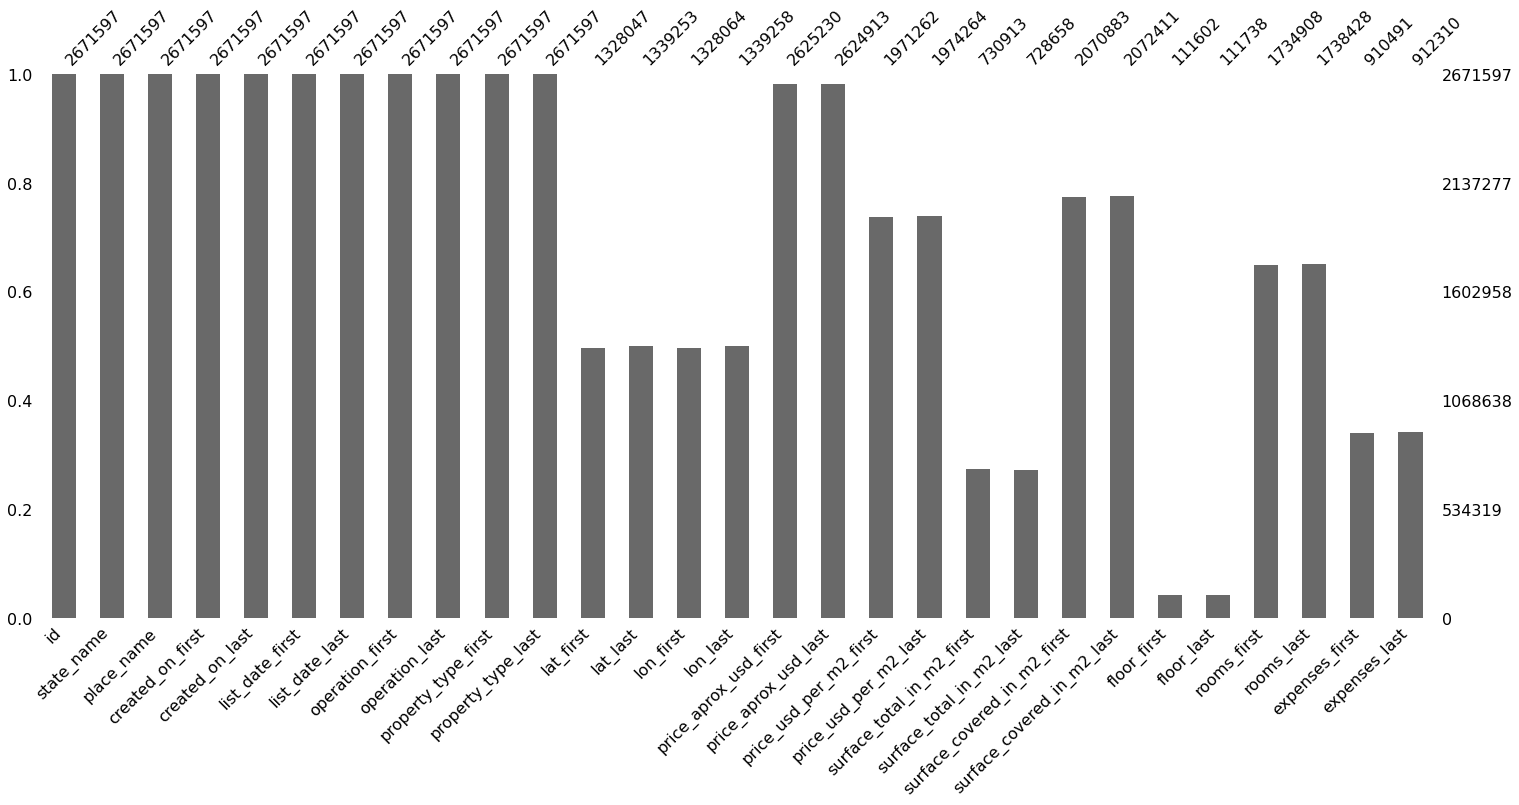

In [20]:
#visualize missing values

msno.bar(data_unique)
plt.show()

In [21]:
#fill missing values with 0 as indicator
#(missing values are not yet deleted as this needs further investigation in coordination with the process owners)

numeric = data_unique.select_dtypes(include = ['float64', 'Int64']).columns

data_unique[numeric] = data_unique[numeric].fillna(0)

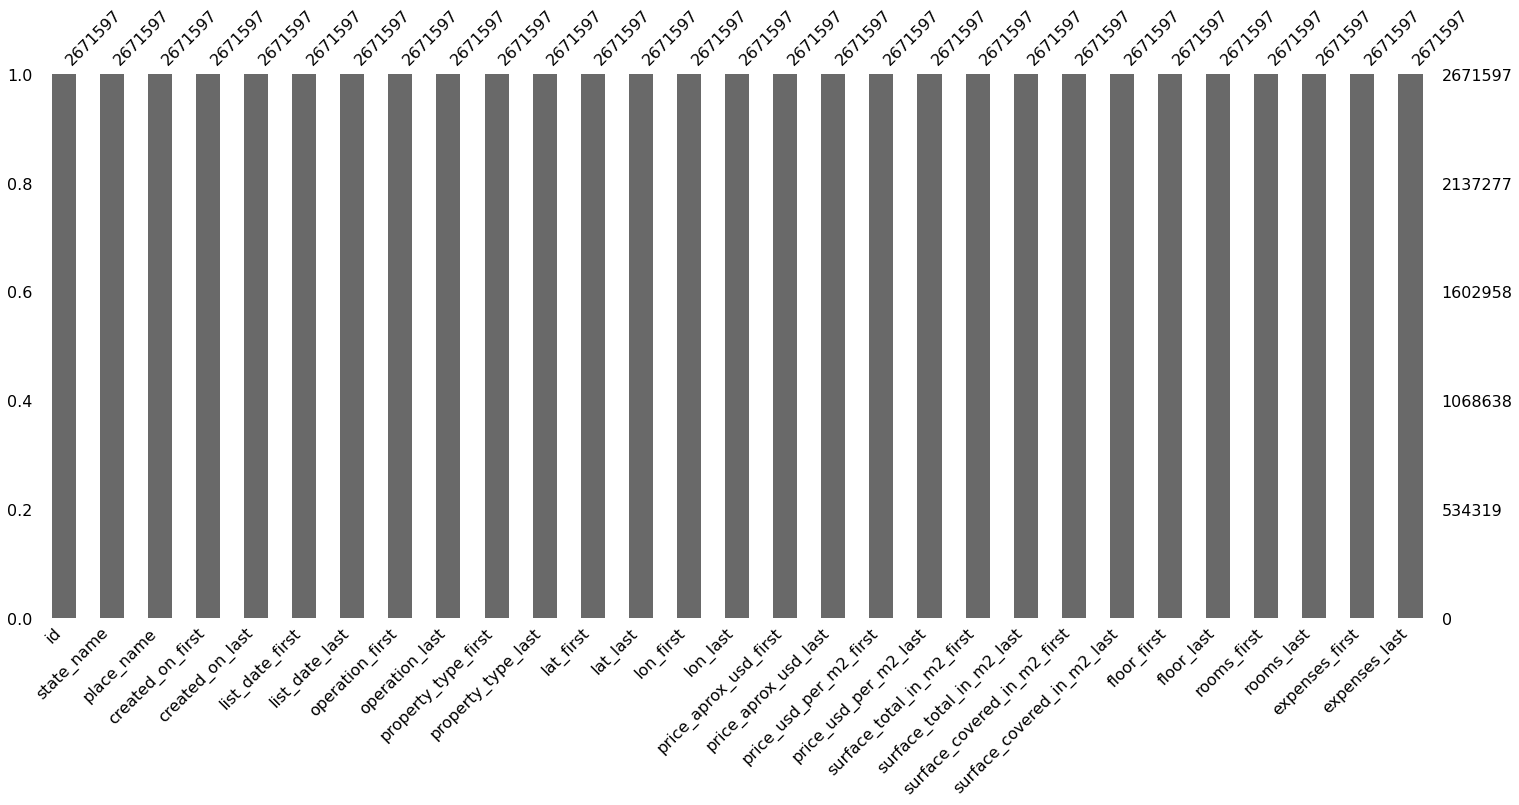

In [22]:
#visualize missing values after fill operation

msno.bar(data_unique)
plt.show()

#### Add column for operation indicator with possible values: `rent`, `sell`, `rent to sell`, `sell to rent`

In [23]:
#create function to classify the operations (this method is faster than iterationg through the rows)

def operation_ind(df, first, last, ind):
    df.loc[(df['operation_first'] == first) & 
            (df['operation_last'] == last), 'operation_ind'] = ind

In [24]:
#create empty operation_id column
data_unique['operation_ind'] = 0

#call the operation_ind function
#rent
operation_ind(data_unique, 'rent', 'rent', 'rent')

#sell
operation_ind(data_unique, 'sell', 'sell', 'sell')

#rent to sell
operation_ind(data_unique, 'rent', 'sell', 'rent to sell')

#sell to rent
operation_ind(data_unique, 'sell', 'rent', 'sell to rent')

#### Add column for listing duration: difference between last listing date and first listing date 



In [25]:
#subtract last_list date on first_list_date
data_unique['listing_duration'] = ((data_unique['list_date_last'] - data_unique['list_date_first'])
                                   /np.timedelta64(1, 'M'))

#round results to whole months
data_unique['listing_duration'] = round(data_unique['listing_duration'], 0)


In [26]:
data_unique.head()

,id,state_name,place_name,created_on_first,created_on_last,list_date_first,list_date_last,operation_first,operation_last,property_type_first,property_type_last,lat_first,lat_last,lon_first,lon_last,price_aprox_usd_first,price_aprox_usd_last,price_usd_per_m2_first,price_usd_per_m2_last,surface_total_in_m2_first,surface_total_in_m2_last,surface_covered_in_m2_first,surface_covered_in_m2_last,floor_first,floor_last,rooms_first,rooms_last,expenses_first,expenses_last,operation_ind,listing_duration
0,00000089e977e5a053489c3b35126b2959fa3a51,São Paulo,Centro,2017-10-25,2017-10-25,2017-10-01,2017-10-01,sell,sell,house,house,-22.735127,-22.735127,-47.650131,-47.650131,55082.93,55082.93,550.829300,550.829300,70.0,70.0,100.0,100.0,0,0,0,0,0.0,0.0,sell,0.0
1,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,São Paulo,Cotia,2017-05-23,2017-05-23,2017-05-01,2017-11-01,sell,sell,house,house,-23.597948,-23.597948,-46.865257,-46.865257,607707.81,541701.97,1110.983199,990.314388,0.0,0.0,547.0,547.0,0,0,4,4,1070.0,1070.0,sell,6.0
2,0000138839f8521c7c386be20ffb9e33a43a89cc,São Paulo,Parque Mandaqui,2015-12-18,2015-12-18,2015-12-01,2016-06-01,sell,sell,apartment,apartment,0.000000,0.000000,0.000000,0.000000,131186.83,122142.46,2677.282245,2492.703265,0.0,0.0,49.0,49.0,0,0,0,0,450.0,450.0,sell,6.0
3,00001569c2982362b326e016518df7d57afaaa3c,São Paulo,São Paulo,2015-03-25,2015-03-25,2015-03-01,2015-03-01,sell,sell,apartment,apartment,-23.614178,-23.614178,-46.652672,-46.652672,174735.39,174735.39,3296.894151,3296.894151,100.0,100.0,53.0,53.0,0,0,2,2,760.0,760.0,sell,0.0
4,00001977c31a410c52e544562a08df5e0670141f,São Paulo,Perdizes,2016-09-25,2016-09-25,2016-09-01,2017-03-01,sell,sell,house,house,-23.527781,-23.527781,-46.687515,-46.687515,491536.35,491536.35,2533.692526,2533.692526,168.0,168.0,194.0,194.0,0,0,0,0,0.0,0.0,sell,6.0


#### Add column for property status: `active` if list_date_last is equal to the max list_date, else `inactive`



In [27]:
#create empty status column
data_unique['status'] = 0

#store max lis_date in variable: current
current = data_unique['list_date_last'].max()


In [28]:
#insert status labels

data_unique.loc[data_unique['list_date_last'] == current, 'status'] = 'active'
data_unique.loc[data_unique['list_date_last'] != current, 'status'] = 'inactive'

#### Add `owner_id` and `property_id` column

In [29]:
#rename id to owner_id

data_unique.rename(columns = {'id':'owner_id'}, inplace = True)

In [30]:
#create property_id as unique identifier

property_id = data_unique['owner_id'].astype('str') + '-' + data_unique['state_name'].astype('str') +'-' + data_unique['place_name'].astype('str')
data_unique.insert(0, 'property_id', property_id)

### Save file (optional)

In [31]:
data_unique.head()

,property_id,owner_id,state_name,place_name,created_on_first,created_on_last,list_date_first,list_date_last,operation_first,operation_last,property_type_first,property_type_last,lat_first,lat_last,lon_first,lon_last,price_aprox_usd_first,price_aprox_usd_last,price_usd_per_m2_first,price_usd_per_m2_last,surface_total_in_m2_first,surface_total_in_m2_last,surface_covered_in_m2_first,surface_covered_in_m2_last,floor_first,floor_last,rooms_first,rooms_last,expenses_first,expenses_last,operation_ind,listing_duration,status
0,00000089e977e5a053489c3b35126b2959fa3a51-São P...,00000089e977e5a053489c3b35126b2959fa3a51,São Paulo,Centro,2017-10-25,2017-10-25,2017-10-01,2017-10-01,sell,sell,house,house,-22.735127,-22.735127,-47.650131,-47.650131,55082.93,55082.93,550.829300,550.829300,70.0,70.0,100.0,100.0,0,0,0,0,0.0,0.0,sell,0.0,inactive
1,00000290f4e7f9c00eaf10fd74648d2b85a8ff38-São P...,00000290f4e7f9c00eaf10fd74648d2b85a8ff38,São Paulo,Cotia,2017-05-23,2017-05-23,2017-05-01,2017-11-01,sell,sell,house,house,-23.597948,-23.597948,-46.865257,-46.865257,607707.81,541701.97,1110.983199,990.314388,0.0,0.0,547.0,547.0,0,0,4,4,1070.0,1070.0,sell,6.0,inactive
2,0000138839f8521c7c386be20ffb9e33a43a89cc-São P...,0000138839f8521c7c386be20ffb9e33a43a89cc,São Paulo,Parque Mandaqui,2015-12-18,2015-12-18,2015-12-01,2016-06-01,sell,sell,apartment,apartment,0.000000,0.000000,0.000000,0.000000,131186.83,122142.46,2677.282245,2492.703265,0.0,0.0,49.0,49.0,0,0,0,0,450.0,450.0,sell,6.0,inactive
3,00001569c2982362b326e016518df7d57afaaa3c-São P...,00001569c2982362b326e016518df7d57afaaa3c,São Paulo,São Paulo,2015-03-25,2015-03-25,2015-03-01,2015-03-01,sell,sell,apartment,apartment,-23.614178,-23.614178,-46.652672,-46.652672,174735.39,174735.39,3296.894151,3296.894151,100.0,100.0,53.0,53.0,0,0,2,2,760.0,760.0,sell,0.0,inactive
4,00001977c31a410c52e544562a08df5e0670141f-São P...,00001977c31a410c52e544562a08df5e0670141f,São Paulo,Perdizes,2016-09-25,2016-09-25,2016-09-01,2017-03-01,sell,sell,house,house,-23.527781,-23.527781,-46.687515,-46.687515,491536.35,491536.35,2533.692526,2533.692526,168.0,168.0,194.0,194.0,0,0,0,0,0.0,0.0,sell,6.0,inactive


In [32]:
#data_unique.to_csv('Dataset/Processed/Brazil Real Estate Listings.csv', index = False)

## OUTPUT TABLE: `Brazil Real Estate Listings - Price Trend`

### Data Cleaning

In [33]:
#create a subset of data to include id, state_name, place_name, and price for trend analysis

trend = data[['id', 'state_name', 'place_name', 'list_date', 'price_aprox_usd']]
trend.head()

,id,state_name,place_name,list_date,price_aprox_usd
0,427a36675ef7c2a56cdb63bbed77d1bac3765cde,Bahia,Bahia,2018-02-01,1257.38
1,de132d9bc166c220ab62bf71346013d6e761b75a,Ceará,Ceará,2018-02-01,2535.65
2,93bbfff212e6b4377a713c48461f6ff5122e41ac,Ceará,Ceará,2018-02-01,234.22
3,078be561da4822480c5eed29c66b65b20f287739,Pernambuco,Pernambuco,2018-02-01,157.17
4,8b0846a3c82b8c790f815fb66c2aedffdd82e3a5,Pernambuco,Pernambuco,2018-02-01,507.13


In [34]:
#rename id to owner_id

trend.rename(columns = {'id':'owner_id'}, inplace = True)

In [35]:
#create property_id as unique identifier

property_id = trend['owner_id'].astype('str') + '-' + trend['state_name'].astype('str') +'-' + trend['place_name'].astype('str')
trend.insert(0, 'property_id', property_id)

In [36]:
#fill missing values with 0 as indicator

trend['price_aprox_usd'].fillna(0, inplace = True)

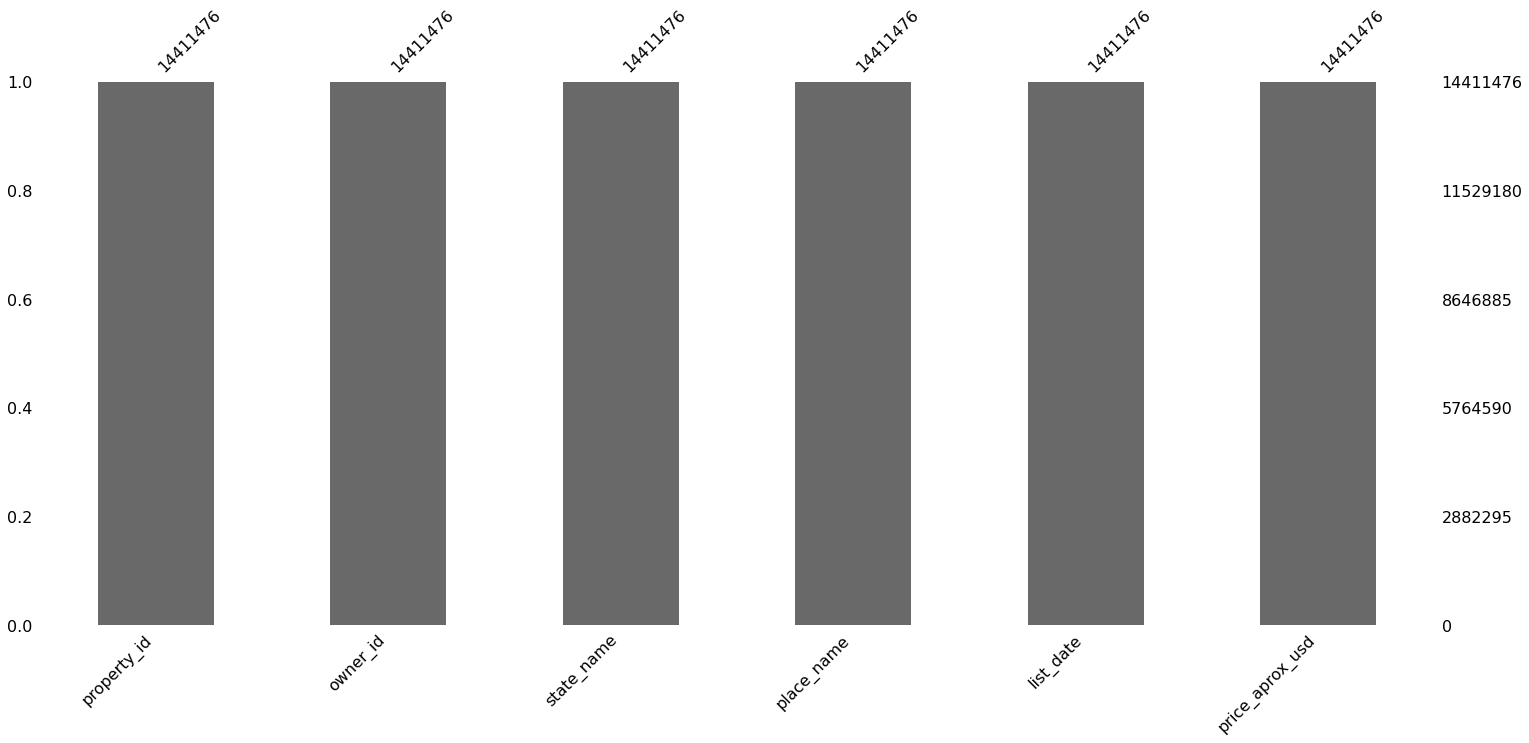

In [37]:
#visualize missing values after fillna() operation

msno.bar(trend)
plt.show()

### Save File (optional)

In [38]:
trend.head()

,property_id,owner_id,state_name,place_name,list_date,price_aprox_usd
0,427a36675ef7c2a56cdb63bbed77d1bac3765cde-Bahia...,427a36675ef7c2a56cdb63bbed77d1bac3765cde,Bahia,Bahia,2018-02-01,1257.38
1,de132d9bc166c220ab62bf71346013d6e761b75a-Ceará...,de132d9bc166c220ab62bf71346013d6e761b75a,Ceará,Ceará,2018-02-01,2535.65
2,93bbfff212e6b4377a713c48461f6ff5122e41ac-Ceará...,93bbfff212e6b4377a713c48461f6ff5122e41ac,Ceará,Ceará,2018-02-01,234.22
3,078be561da4822480c5eed29c66b65b20f287739-Perna...,078be561da4822480c5eed29c66b65b20f287739,Pernambuco,Pernambuco,2018-02-01,157.17
4,8b0846a3c82b8c790f815fb66c2aedffdd82e3a5-Perna...,8b0846a3c82b8c790f815fb66c2aedffdd82e3a5,Pernambuco,Pernambuco,2018-02-01,507.13


In [39]:
trend.to_csv('Dataset/Processed/Brazil Real Estate Listings - Price Trend.csv', index = False)

## Load to Google BigQuery

In [40]:
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas_gbq

credentials = service_account.Credentials.from_service_account_file('Config/brazil-real-estate-351608-faf83ded68f9.json')
project_id = 'brazil-real-estate-351608'

### Brazil Real Estate Listings Table

In [41]:
#table_id = 'brazil_real_estate.brazil_real_estate_listing'

#pandas_gbq.to_gbq(data_unique, table_id, project_id=project_id, if_exists = 'replace')

### Brazil Real Estate Listings Table - Price Trend

In [42]:
#table_id = 'brazil_real_estate.brazil_real_estate_listing_price_trend'

#pandas_gbq.to_gbq(trend, table_id, project_id=project_id, if_exists = 'replace')